In [28]:
import os
import pandas as pd

df_articles = pd.read_pickle("../data/processed/parsed_articles.pkl")

In [29]:
df_articles.shape

(43666, 9)

In [30]:
expected_n_articles = 500 * 86 + 305 + 361

In [31]:
df_articles.shape[0] - expected_n_articles

0

In [32]:
print(f"Number of files: {len(set(df_articles["source_file"]))}")

Number of files: 88


## 1. Repeated Titles

In [33]:
anomalous_titles = {key:value for key, value in dict(df_articles['title'].value_counts()).items() if value > 100}
anomalous_titles

{'No Headline In Original': np.int64(368), 'Movie guide': np.int64(101)}

In [34]:
df_no_headline = df_articles.loc[df_articles["title"] == "No Headline In Original"]
df_no_headline

,title,publisher,date,section,length,body,correction_appended,load_date_at_end,source_file
446,No Headline In Original,The New York Times,2024-09-01,Section MB; Column 0; Metropolitan Desk; Pg. 3...,533 words,"\n\nIn the Schools: Dress Codes, Self-Expressi...",False,False,NYT/55.DOCX
457,No Headline In Original,The New York Times,2022-01-30,Section MB; Column 0; Metropolitan Desk; Pg. 3...,774 words,"\n\nHow Fire Defined the Bronx, and Us\nReader...",False,False,NYT/55.DOCX
460,No Headline In Original,The New York Times,2021-07-11,Section MB; Column 0; Metropolitan Desk; Pg. 3...,686 words,\n\nWhen New York Was Ours Alone\nReaders resp...,False,False,NYT/55.DOCX
260,No Headline In Original,The Philadelphia Inquirer,2023-05-20,MAIN NEWS; Pg. A1,669 words,\n\nABSTRACT\nCherelle Parker is still recover...,False,False,Other publishers/Files (500) (31).DOCX
262,No Headline In Original,The Philadelphia Inquirer,2022-05-18,NEWS; Pg. A1,1550 words,"\n\nPITTSBURGH - John Fetterman, the Pennsylva...",False,False,Other publishers/Files (500) (31).DOCX
...,...,...,...,...,...,...,...,...,...
356,No Headline In Original,The New York Times,2011-04-03,Section AR; Column 0; Arts and Leisure Desk; P...,142 words,\n\nHere's a sampling of readers' responses to...,False,False,NYT/56.361.DOCX
357,No Headline In Original,The New York Times,1996-01-11,Section A;; Section A; Page 2; Column 6; Metro...,46 words,"\n\n""It's not the process that Senator Helms o...",False,False,NYT/56.361.DOCX
358,No Headline In Original,The New York Times,2008-06-22,Section SP; Column 0; Sports Desk; Pg. 10; OUT...,161 words,\n\nThe five most e-mailed articles from nytim...,False,False,NYT/56.361.DOCX
359,No Headline In Original,The New York Times,1986-06-11,"Section B; Page 1, Column 6; Metropolitan Desk...",40 words,\n\n''The Celtics mean everything to Boston. T...,False,False,NYT/56.361.DOCX


In [35]:
print(df_no_headline['body'].iloc[0])



In the Schools: Dress Codes, Self-Expression and Inequity
Readers responded by letter and at nytimes.com to Ginia Bellafante's Big City column on Aug. 18 about student dress codes and whether school uniforms should be required. Comments were edited.   I grew up in a working-class family, only ever had thrift store clothes, and was a social pariah because of that. Now my kid attends a New York City charter school where uniforms are required. I love it. The uniform completely removes any sense of ever having the ''wrong'' clothes, which I can attest from personal experience means that a major distraction is just completely removed from the day's equation. There's still some room for personal expression. There are dress, skirt, pants and shorts options, and two possible colors of shirts.
  Emily St. John Mandel, New York
  Every new school year, we grapple with how to make sure that our students are mindful, respectful and safe while maintaining independence and self-expression. This ye

__Questions for team__

* "No Headline In Original" sometimes appear as the actual title in the raw data. However, the first paragraph in the article's body appear to be the title: take this item in the cleaning steps?

* Review other more common titles (appearing more than 20 times)

## Missing "working class" keywords

In [36]:
def clean_body(text):
    if isinstance(text, str):
        return (text
                .replace("  ", " ")
                .replace(" -", "-")
                .replace("- ", "-")
                .replace("-\xad", "-")
                .replace("‑", "-")
                .replace("-/", "-")
                .replace("-\n", "-"))
    return text  # Leave non-strings (e.g., NaN) unchanged

df_articles['body_cleaned'] = df_articles['body'].apply(clean_body)

In [37]:
df_missing_working_class = df_articles[[('working-class' not in str(i).lower()) and ('working class' not in str(i).lower()) and ('(working) class' not in str(i).lower()) for i in df_articles['body_cleaned']]]
df_missing_working_class = df_missing_working_class[[('working-class' not in str(i).lower()) and ('working class' not in str(i).lower()) for i in df_missing_working_class['title']]]

df_missing_working_class.head(2)

,title,publisher,date,section,length,body,correction_appended,load_date_at_end,source_file,body_cleaned
423,"Desperate Years: To Be Young, British and Lack...",The New York Times,2013-12-19,MOVIES,616 words,\n\nFor today’s socially conscious British fil...,False,False,NYT/23.DOCX,\n\nFor today’s socially conscious British fil...
466,The G.O.P. Can Avoid A Disaster,The New York Times,2018-04-05,Section A; Column 0; Editorial Desk; Pg. 27; O...,1204 words,\n\nWith Democrats winning in normally deep re...,False,False,NYT/23.DOCX,\n\nWith Democrats winning in normally deep re...


In [38]:
# percetnage time missing
fraction_missing = (df_missing_working_class.shape[0]) / df_articles.shape[0]
if fraction_missing > 0:
    print("Data issue: {}% of articles don't include the working class keyworks.".format(round(fraction_missing*100,2)))
else:
    print("Issue resolved.")

Data issue: 0.61% of articles don't include the working class keyworks.


In [39]:
df_missing_working_class["title"].iloc[1]

'The G.O.P. Can Avoid A Disaster'

In [40]:
print(df_missing_working_class["body_cleaned"].iloc[1])



With Democrats winning in normally deep red places like Alabama and Pennsylvania's 18th Congressional District, it looks like a blue wave is swelling for the midterm elections.
There's still time for Republicans to change that, but first they must figure out how to mount an effective defense. To do that, they need to focus on a largely overlooked group of voters: Donald Trump voters who did not like him. 
 According to the 2016 exit polls, 18 percent of Americans did not like either Mr. Trump or Hillary Clinton. Mr. Trump owes his victory to the fact that he beat her among this group by a 17-point margin, 47 percent to 30 percent (the remainder voted for a third party or write-in candidate). Multiplying Mr. Trump's percentage among this group by the group's share of the electorate yields a startling fact: Nearly one-fifth of all Trump voters didn't like him.
 This is a shockingly high share; it goes a long way toward explaining why places that voted for Mr. Trump in 2016 could be vot

In [41]:
print(df_missing_working_class["source_file"].iloc[1])

NYT/23.DOCX


__Question for team__

* See example above with team (23.DOCX): 'The G.O.P. Can Avoid A Disaster'. interesting anomaly: "working-class" appears out of body and title. what to do with these cases?

### Check dates

In [42]:
df_missing_dates = df_articles.loc[df_articles['date'].isna()]
df_missing_dates.shape

(0, 10)

In [43]:
parsed_dates = pd.to_datetime(df_articles["date"]).dt.date

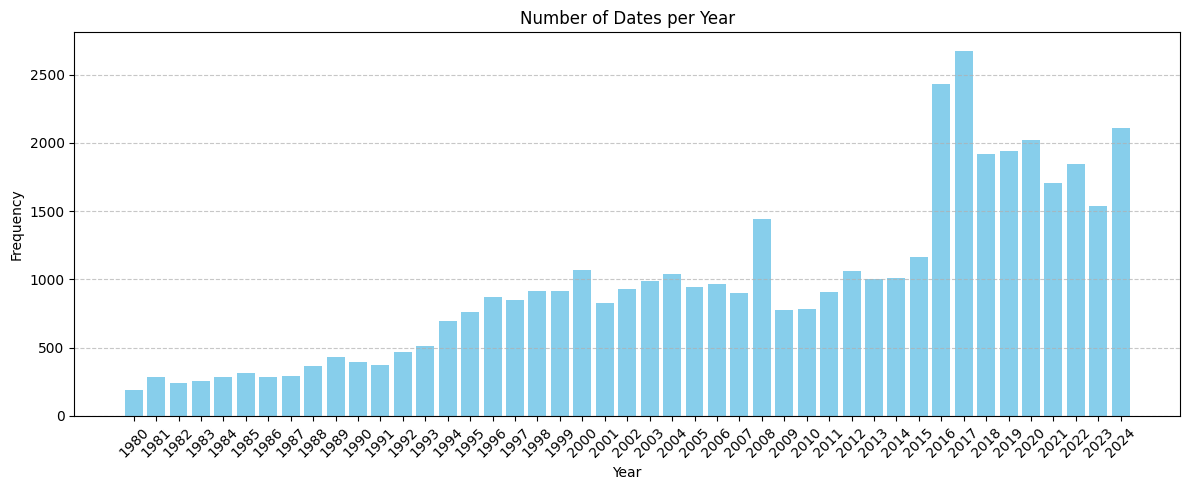

In [44]:
import matplotlib.pyplot as plt
from collections import Counter

# Group by year
years = [d.year for d in parsed_dates]
year_counts = Counter(years)

# Sort by year
sorted_years = sorted(year_counts)
frequencies = [year_counts[year] for year in sorted_years]

# Plot
plt.figure(figsize=(12, 5))
plt.bar(sorted_years, frequencies, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Number of Dates per Year')
plt.xticks(sorted_years, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



### Other

In [45]:
df_articles["correction_appended"].value_counts()

correction_appended
False    43400
True       266
Name: count, dtype: int64

In [46]:
df_articles["load_date_at_end"].value_counts()

load_date_at_end
False    43471
True       195
Name: count, dtype: int64

In [47]:
set(df_articles["publisher"])

{' Philadelphia Inquirer',
 ' The New York Times',
 ' The Philadelphia Inquirer',
 'Chicago Daily Herald',
 'Dayton Daily News (Ohio)',
 'February 1, 2007 Thursday',
 'Pittsburgh Post-Gazette',
 'Pittsburgh Post-Gazette (Pennsylvania)',
 'Star Tribune',
 'Star Tribune (Minneapolis, MN)',
 'The New York Times',
 'The New York Times ',
 'The New York Times Blogs ',
 'The New York Times\xa0',
 'The Philadelphia Inquirer',
 'USA TODAY',
 'USA Today'}

In [48]:
df_articles["correction_appended"].value_counts()

correction_appended
False    43400
True       266
Name: count, dtype: int64